Simpson's Paradox is where there are clusters of data and a variable which shows one type of correlation if interpolated *within* each data cluster, but the opposite if extrapolated *across* the data clusters. 

For example, suppose there are green blobs and purple blobs. Green blobs weigh at least 10kg and at most 20kg, and purple blobs weigh at least 15kg and at most 25kg. For green blobs, their happiness is equal to their mass, plus some random noise. For purple blobs, their happiness is their mass minus 15, plus some random noise. 

Clearly for any blob, they will be happier if they have more mass. But because of the two clusters of data, the opposite appears true if extrapolated across the classes! This has serious implications in real world examples: what happens if a medicine decreases risk of fatality in both men and in women, but if we extrapolate it across both together it looks like it increases fatality? 

More on Simpson's Paradox here: https://en.wikipedia.org/wiki/Simpson's_paradox

Imports

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

Data and Plotting

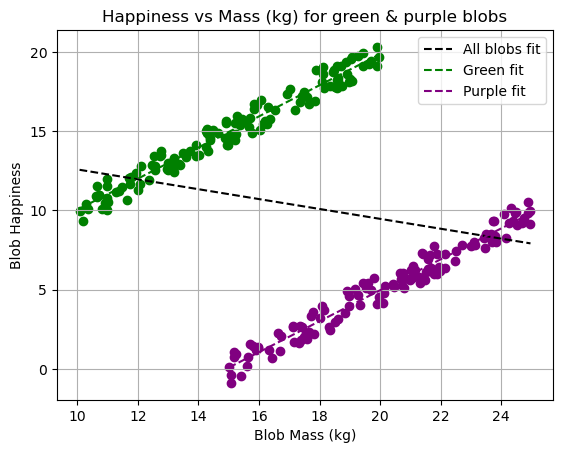

In [2]:
def generateBlob():
    blobType = r.choice([0, 1]) #0 for green, 1 for purple
    blobMass = r.uniform(10, 20) + blobType * 5
    blobHappiness = blobMass - (15 * blobType) + r.uniform(-1, 1)
    return(blobMass, blobHappiness, blobType)

greenBlobs = []
purpleBlobs = []
allBlobs = []

nBlobs = 250
for i in range(nBlobs):
    newBlob = generateBlob()
    allBlobs.append(newBlob)
    if newBlob[2] == 1:
        purpleBlobs.append(newBlob)
    else:
        greenBlobs.append(newBlob)

allArr = np.array(allBlobs)
greenArr = np.array(greenBlobs)
purpleArr = np.array(purpleBlobs)

colors = ["Green", "Purple"]
for blob in allBlobs:
    plt.scatter(blob[0], blob[1], color = colors[blob[2]])

def plotFit(data, color, label):
    masses = data[:,0]
    happinesses = data[:,1]
    coefficients = np.polyfit(masses, happinesses, 1)
    fitLine = np.poly1d(coefficients)
    xRange = np.linspace(min(masses), max(masses), 100)
    plt.plot(xRange, fitLine(xRange), color = color.lower(), linestyle = "--", label = label)

plt.title("Happiness vs Mass (kg) for green & purple blobs") 
plotFit(allArr, "Black", "All blobs fit")
plotFit(greenArr, "Green", "Green fit")
plotFit(purpleArr, "Purple", "Purple fit")
plt.xlabel("Blob Mass (kg)")
plt.ylabel("Blob Happiness")
plt.grid(True)
plt.legend()
plt.show()